In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import sklearn.model_selection as sms
import sklearn.linear_model as slm

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
true_value = pd.read_csv("gender_submission.csv")

<h1> Data Exploration </h1>

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
train.head()
#drop Name, Ticket, Cabin, Embarked, PassangerId, Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
dColumn=["Cabin","Name","Ticket","PassengerId","Pclass","Fare","Embarked"]
df = train.drop(dColumn, axis=1)
df["Sex"] =pd.get_dummies(data=df["Sex"],drop_first=True)
df = pd.concat([df,pd.get_dummies(train["Pclass"],prefix="Class")],axis=1)
x_test = test.drop(dColumn, axis=1)
x_test["Sex"] =pd.get_dummies(data=x_test["Sex"],drop_first=True)
x_test = pd.concat([x_test,pd.get_dummies(test["Pclass"],prefix="Class")],axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    bool   
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Class_1   891 non-null    bool   
 6   Class_2   891 non-null    bool   
 7   Class_3   891 non-null    bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 31.5 KB


In [64]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sex      418 non-null    bool   
 1   Age      332 non-null    float64
 2   SibSp    418 non-null    int64  
 3   Parch    418 non-null    int64  
 4   Class_1  418 non-null    bool   
 5   Class_2  418 non-null    bool   
 6   Class_3  418 non-null    bool   
dtypes: bool(4), float64(1), int64(2)
memory usage: 11.6 KB


In [32]:
df.isna().any(axis=1).sum()

177

29.69911764705882


31.08389687877613

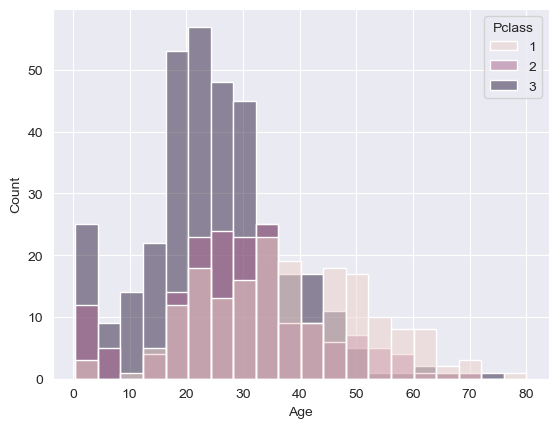

In [43]:
sns.histplot(data=train,x="Age",hue="Pclass")

In [45]:
df["Age"].fillna((train[train["Pclass"] == 1]["Age"].mean()+train[train["Pclass"] == 2]["Age"].mean()+train[train["Pclass"] == 3]["Age"].mean())/3,inplace=True)
df.isna().any(axis=1).sum()

0

<Axes: >

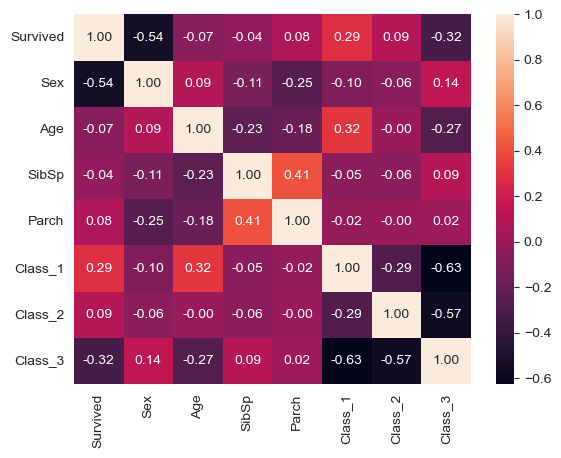

In [46]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
#Age,SubSp,"SibSp" has small corr

In [65]:
x_train = df.drop(["Survived","Age","SibSp","Parch"],axis=1)
x_test = x_test.drop(["Age","SibSp","Parch"],axis=1)
y_train = df["Survived"]
y_test = true_value["Survived"]

<h1>Classfication</h1>

In [67]:
LR = slm.LogisticRegression()
result = LR.fit(x_train,y_train)
pred = LR.predict(x_test)
mse = np.mean((pred-y_test)**2)
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = pd.DataFrame(metrics.confusion_matrix(y_test, pred)).transpose()
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)

Accuracy: 1.0
Confusion Matrix:
     0    1
0  266    0
1    0  152
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Index(['Sex', 'Class_1', 'Class_2', 'Class_3'], dtype='object')


<h3>That Show to us that most survived was from class 1 with was near to Rescue boats and most of dead was from class 3 who was in the low part in the ship which was hard for them to reach Rescue boats</h3>

<Axes: xlabel='Survived', ylabel='Count'>

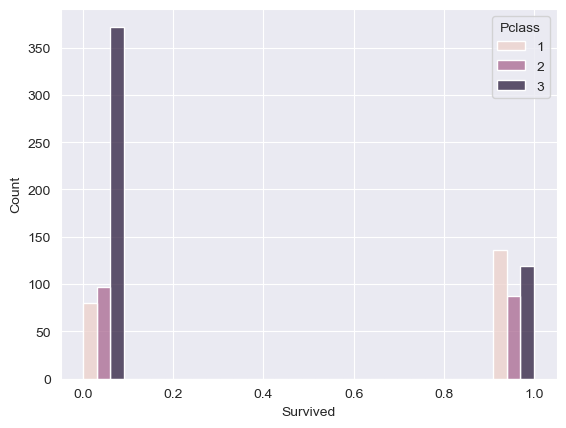

In [73]:
sns.histplot(data=train,x="Survived",hue="Pclass",multiple="dodge")

<h3>That Show to us that most survived was Female with was the priority to get in Rescue boats</h3>

<Axes: xlabel='Survived', ylabel='Count'>

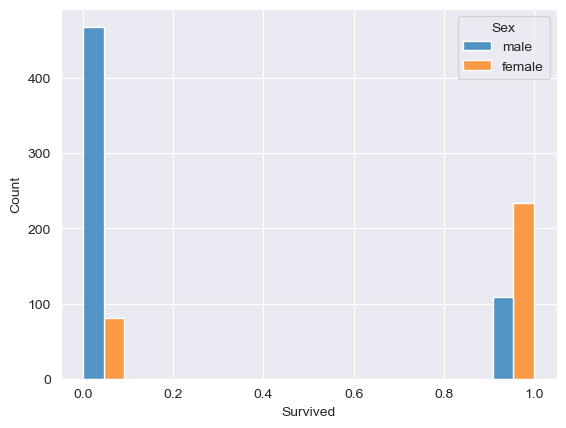

In [74]:
sns.histplot(data=train,x="Survived",hue="Sex",multiple="dodge")